# Plot raw Delta Sigma signals

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from   matplotlib.pyplot import *
import sys
import pylab as pl
import numpy as np
from   copy import copy
import pandas
from astropy.io import fits
from astropy.table import Table, Column
import os.path

from numpy import genfromtxt
from math import *
from astropy.coordinates import SkyCoord
import pandas as pd  
import scipy.stats
from scipy import stats

from scipy import optimize

import seaborn as sns

In [3]:
# Saito et al. 2016 HOD
# converted to phys and h=0.7

data=np.loadtxt('hod_model_saito2016_mdpl2.txt')
hod_x=data[:,0]
hod_y=data[:,1]

# Arbitrary, normalization not important for this paper
hod_factor=0.8

['DES', 'CFHT', 'HSC', 'CS82', 'KiDS', 'SDSS']
0 LOWZ_0.15_0.31 DES
1 LOWZ_0.15_0.31 CFHT
2 LOWZ_0.15_0.31 HSC
3 LOWZ_0.15_0.31 CS82
4 LOWZ_0.15_0.31 KiDS
5 LOWZ_0.15_0.31 SDSS
['DES', 'CFHT', 'HSC', 'CS82', 'KiDS', 'SDSS']
0 LOWZ_0.31_0.43 DES
1 LOWZ_0.31_0.43 CFHT
2 LOWZ_0.31_0.43 HSC
3 LOWZ_0.31_0.43 CS82
4 LOWZ_0.31_0.43 KiDS
5 LOWZ_0.31_0.43 SDSS
['DES', 'CFHT', 'HSC', 'CS82', 'KiDS']
0 CMASS_0.43_0.54 DES
1 CMASS_0.43_0.54 CFHT
2 CMASS_0.43_0.54 HSC
3 CMASS_0.43_0.54 CS82
4 CMASS_0.43_0.54 KiDS
['DES', 'CFHT', 'HSC', 'CS82', 'KiDS']
0 CMASS_0.54_0.7 DES
1 CMASS_0.54_0.7 CFHT


/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
/anacond

2 CMASS_0.54_0.7 HSC
3 CMASS_0.54_0.7 CS82
4 CMASS_0.54_0.7 KiDS


/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
/anacond

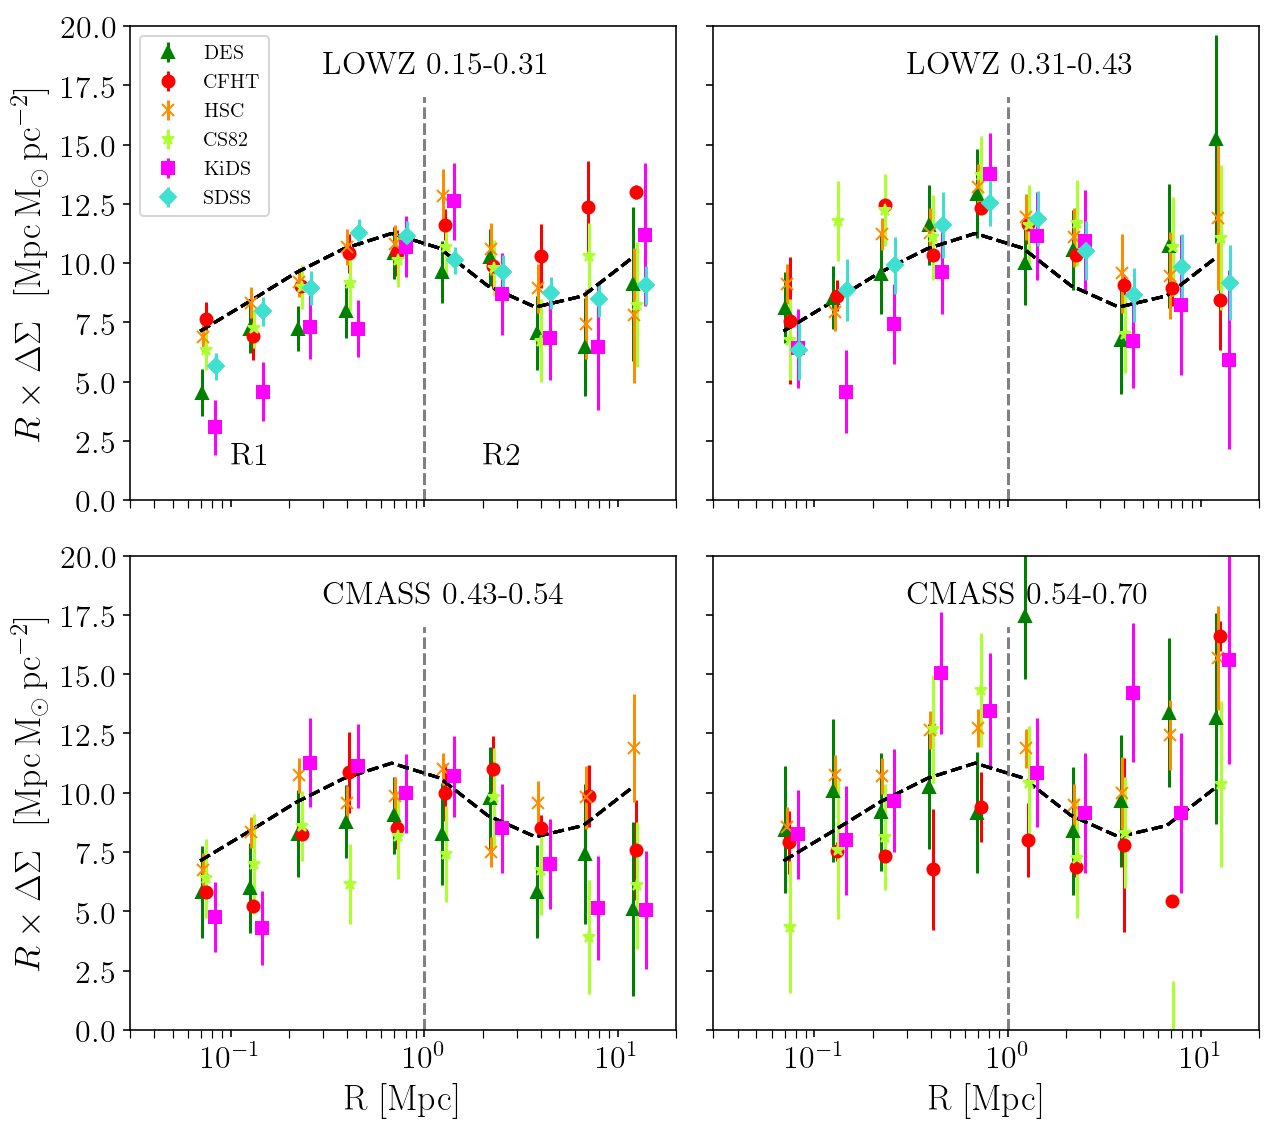

In [20]:
Fig, axes = plt.subplots(2,2,figsize=(9,8))
j=0
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
experiments = ["DES","CFHT","HSC","CS82","KiDS","SDSS"] 
colours=['green','red','darkorange','greenyellow','magenta','turquoise']
markers=['^','o','x','*','s','D']
weight_type = "wtot"
samples = ["LOWZ_0.15_0.31","LOWZ_0.31_0.43","CMASS_0.43_0.54","CMASS_0.54_0.7"]
strings = ["LOWZ 0.15-0.31","LOWZ 0.31-0.43","CMASS 0.43-0.54","CMASS 0.54-0.70"]

#offset for visual clarity
delta = 1.0

for ax, sample in zip(axes.flatten(), samples ):
   
    delta = 1.0
    
    if j==2:
        experiments=experiments[:-1]
    print(experiments)
    for i,experiment in enumerate(experiments):
        print(i,sample,experiment)
        name = experiment+"_"+sample+"_"+str(weight_type)+".dat"
        data=np.loadtxt(name)
        ax.errorbar(data[:,0]*delta,data[:,0]*data[:,1], yerr=data[:,0]*data[:,2],color=colours[i],marker=markers[i],label=experiment,linestyle ='')       
        i+=1
        
        delta = delta + 0.04
        
        ax.axvline(x=1.0, ymin=0, ymax=0.85,linestyle='dashed',color='gray',alpha=0.7)
        ax.plot(hod_x, hod_x*hod_y*hod_factor,color='black', linestyle='dashed')
        ax.set_ylim(0,20)
        ax.set_xscale('log')
        ax.set_xlim(xmin=0.03,xmax=20)
        ax.set_xbound(lower=0.03, upper=20)
        ax.tick_params(which='minor', length=4, color='k')
        for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(16) 
        for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(16)
    
    ax.text(0.3, 18, strings[j], fontsize=16)
    j+=1

       
axes[0,0].text(0.1, 1.5, "R1", fontsize=16)
axes[0,0].text(2.0, 1.5, "R2", fontsize=16)
axes[0,0].legend(loc='upper left', fontsize=10)
axes[1,0].set_ylabel(r'$R \times \Delta \Sigma \,\,\,\, [\rm{Mpc} \, M_\odot \, \rm{pc^{-2}}]$', fontsize=18)
axes[0,0].set_ylabel(r'$R \times \Delta \Sigma \,\,\,\, [\rm{Mpc} \,  M_\odot \, \rm{pc^{-2}}]$', fontsize=18)
axes[1,0].set_xlabel('R [Mpc]', fontsize=18)
axes[1,1].set_xlabel('R [Mpc]', fontsize=18)
axes[0,1].set_yticklabels([])
axes[1,1].set_yticklabels([])
axes[0,1].set_xticklabels([])
axes[0,0].set_xticklabels([])
plt.tick_params(axis='y', which='minor')
plt.subplots_adjust(wspace=None, hspace=None)
plt.tight_layout()
#plt.subplots_adjust(left=0.3/10., right=1-0.3/10.0, bottom=0.5/5.0, top=1-0.5/5.0)
plt.savefig("./Figures/DSR"+str(weight_type)+".eps", bbox_inches='tight')
plt.show()  